In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:

df = pd.read_csv('employee_data1.csv')

In [7]:
df.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07/10/1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30/08/1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06/10/1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04/04/1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29/08/1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [10]:
df.describe()

,EmpID,LocationCode,Current Employee Rating
count,3000.000000,3000.000000,3000.000000
mean,2500.500000,44997.180667,2.969000
std,866.169729,29987.331783,1.015078
min,1001.000000,1013.000000,1.000000
25%,1750.750000,17546.000000,2.000000
50%,2500.500000,44150.500000,3.000000
75%,3250.250000,71481.250000,3.000000
max,4000.000000,98052.000000,5.000000


In [11]:
df.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

In [12]:
# Exploratory Data Analysis (EDA)
missing_values = df.isna().sum()
missing_values

EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
dtype: int64

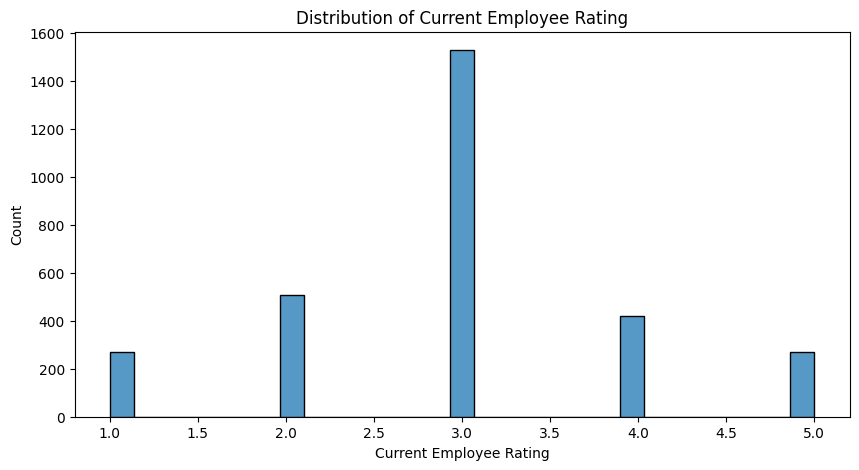

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(data=df['Current Employee Rating'], kde=False)
plt.title('Distribution of Current Employee Rating')
plt.show()

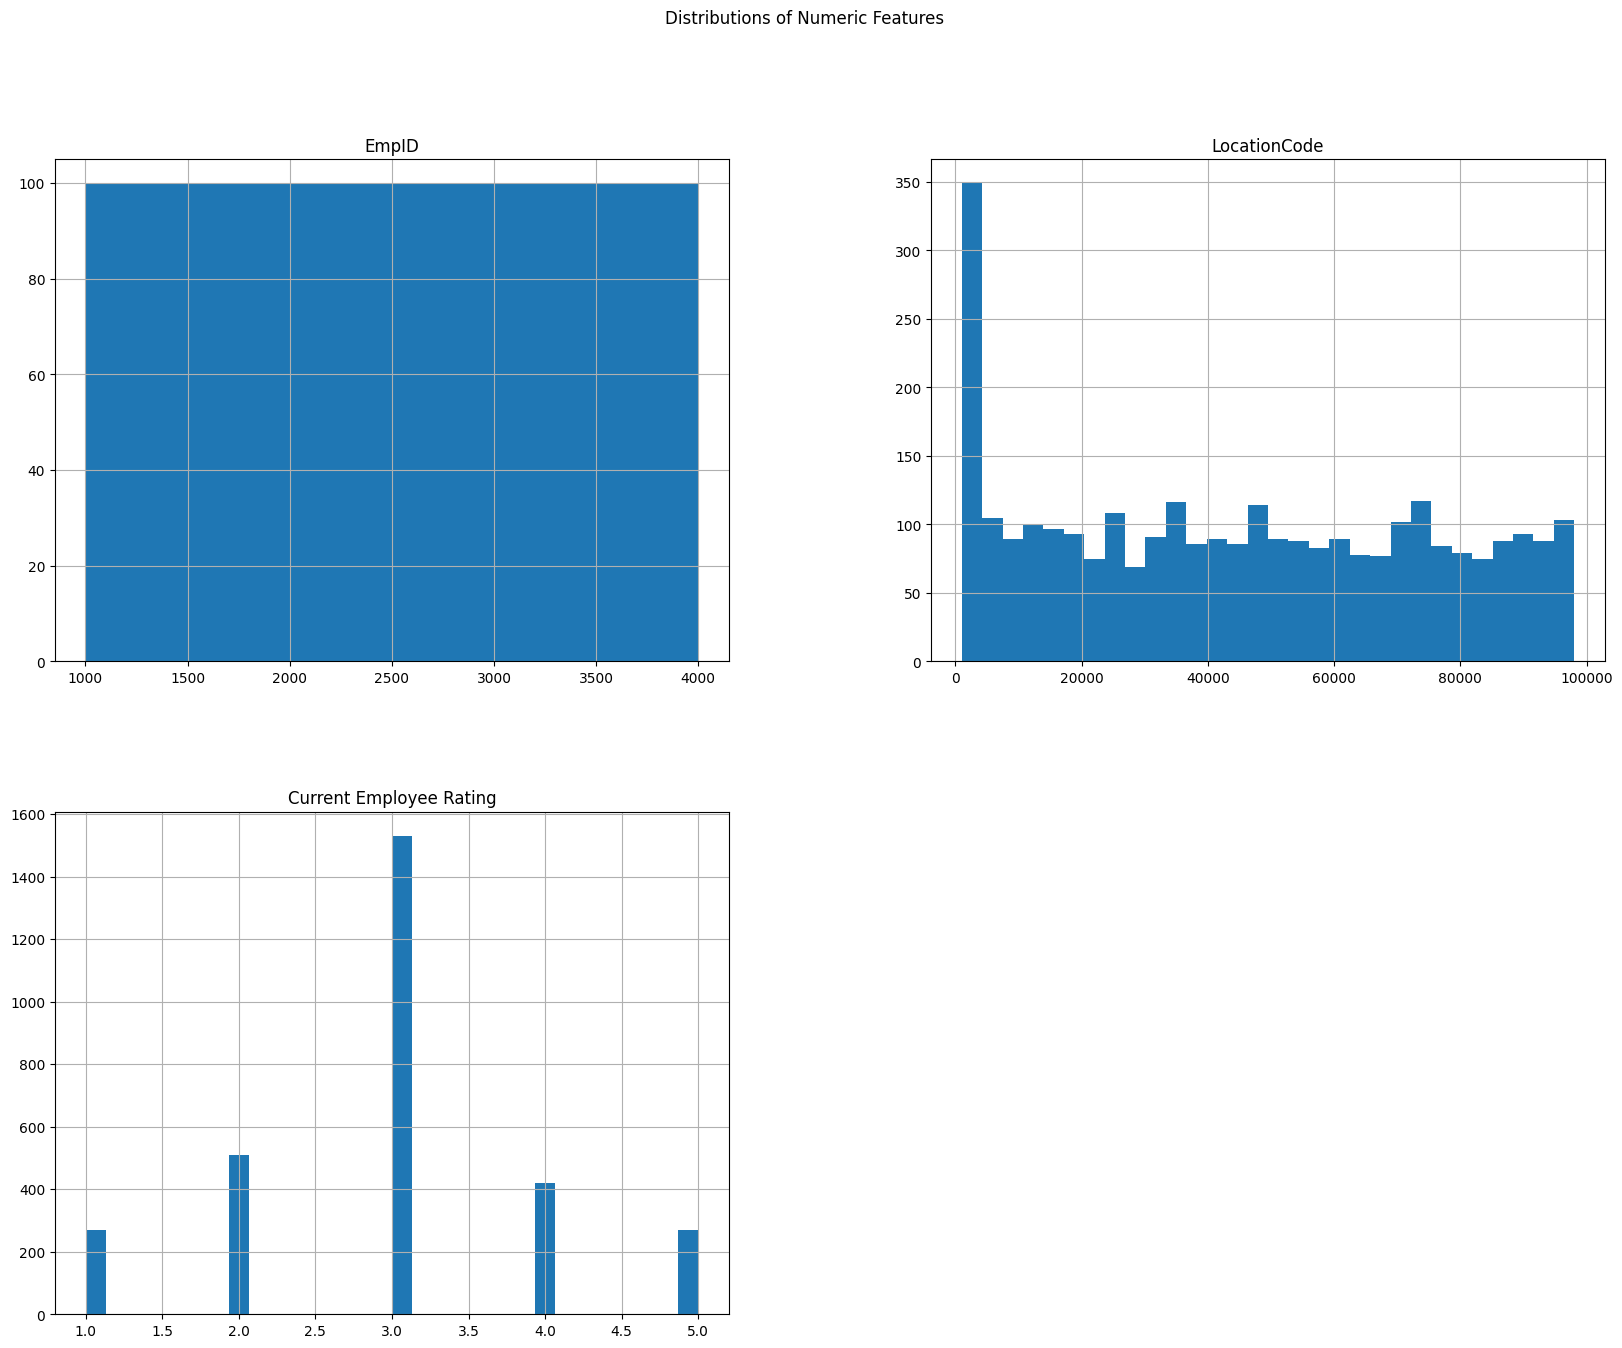

In [13]:
# Visualize distributions of numeric features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distributions of Numeric Features')
plt.show()

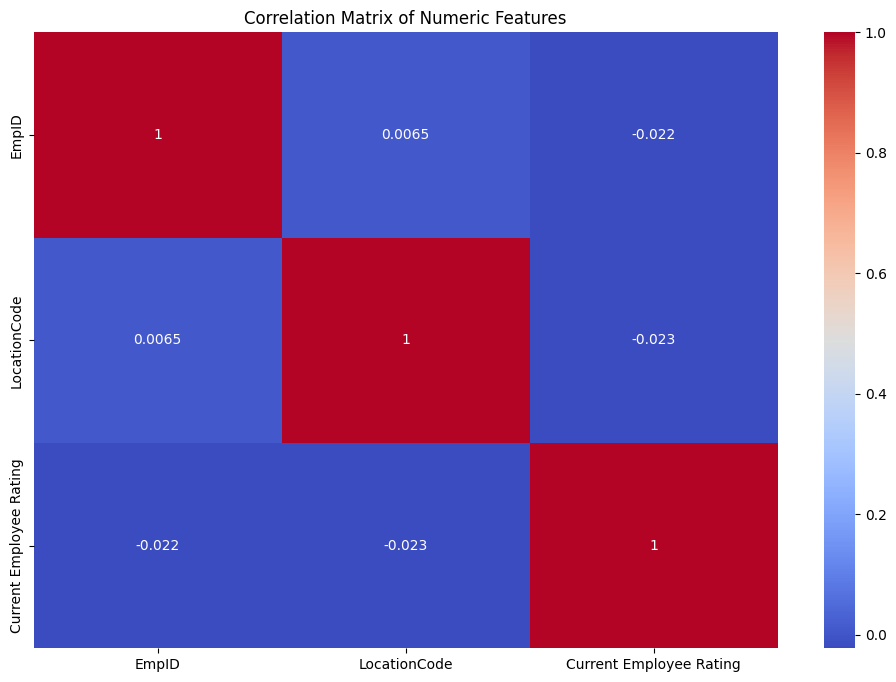

In [14]:
# Correlations
numeric_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [15]:

corr_with_target = corr_matrix['Current Employee Rating'].sort_values(ascending=False)
print(corr_with_target)

Current Employee Rating    1.000000
EmpID                     -0.021722
LocationCode              -0.022504
Name: Current Employee Rating, dtype: float64


In [16]:
# Data Preparation / Preprocessing
if 'Performance Score' in df.columns:
    le = LabelEncoder()
    df['Performance Score'] = le.fit_transform(df['Performance Score'])

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


In [24]:
X = df[numeric_columns].drop(columns='Current Employee Rating')
y = df['Performance Score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
# Train the Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linear_regressor.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:

print(f'Linear Regression - MSE: {mse}, MAE: {mae}, R2: {r2}')

Linear Regression - MSE: 4.837192911300795e-29, MAE: 5.805778698134299e-15, R2: 1.0
